<a href="https://colab.research.google.com/github/woodskd24/MSDataScience/blob/main/SNAP_Benefits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SNAP BENEFITS**

By: Kelsey Woods

In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
SNAP=pd.read_csv("/content/SNAPSummary.csv")
SNAP

,Year,Participation1000,ParticipationDollars1000,BenefitsMill,TotalCost,ParticipantRound
0,1969,"2,878",7,229,251,3000
1,1970,"4,340",11,550,577,4000
2,1971,"9,368",14,1523,1576,9000
3,1972,"11,109",13,1797,1867,11000
4,1973,"12,166",15,2131,2207,12000
5,1974,"12,862",18,2718,2838,13000
6,1975,"17,064",21,4386,4619,17000
7,1976,"18,549",24,5327,5686,19000
8,1977,"17,077",25,5067,5461,17000
9,1978,"16,001",27,5139,5520,16000


In [23]:
SNAP.describe()

,Year,ParticipationDollars1000,BenefitsMill,TotalCost,ParticipantRound
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1995.000000,73.622642,27573.150943,29576.207547,25188.679245
std,15.443445,45.331780,26375.384686,27815.404142,11346.054217
min,1969.000000,7.000000,229.000000,251.000000,3000.000000
25%,1982.000000,39.000000,10500.000000,11225.000000,19000.000000
50%,1995.000000,71.000000,17316.000000,18988.000000,22000.000000
75%,2008.000000,102.000000,34608.000000,37640.000000,28000.000000
max,2021.000000,218.000000,108654.000000,113835.000000,48000.000000


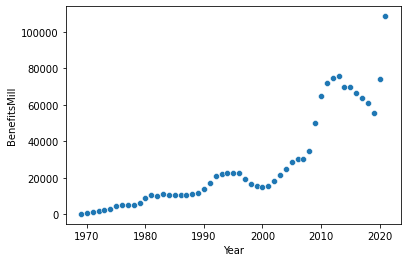

In [24]:
sns.scatterplot(x = "Year", y = "BenefitsMill", data = SNAP)

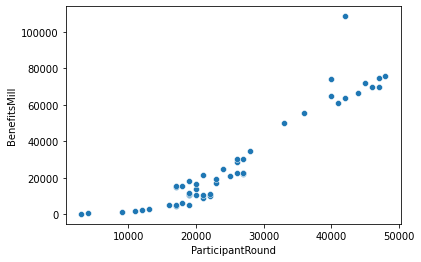

In [26]:
sns.scatterplot(x = "ParticipantRound", y = "BenefitsMill", data = SNAP)

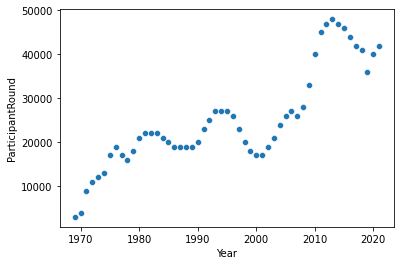

In [36]:
sns.scatterplot(x = "Year", y = "ParticipantRound", data = SNAP)

In [27]:
x = SNAP[['Year']]
y = SNAP['BenefitsMill']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [29]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [30]:
print("Intercept: ", slr.intercept_)
print("Coefficient: ", slr.coef_)

Intercept:  -2869516.926978176
Coefficient:  [1452.24672772]


In [31]:
#Prediction of test set
y_pred_slr= slr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 26263.04809326  59664.72283079  65473.70974167  43690.00882588
  -1329.6397334   16097.32099923  19001.81445466  56760.22937535
  -2781.88646112  34976.52845957  37881.02191501  55307.98264764
  40785.51537045  36428.77518729 -10043.12009971   5931.59390519]


In [32]:
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff.head()

,Actual value,Predicted value
25,22749,26263.048093
48,63711,59664.722831
52,108654,65473.709742
37,30187,43690.008826
6,4386,-1329.639733


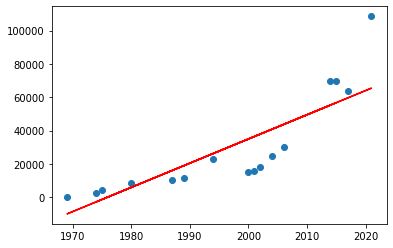

In [33]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred_slr, 'Red')
plt.show()

In [34]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('R squared: {:.2f}'.format(slr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 77.48
Mean Absolute Error: 12855.777568683698
Mean Square Error: 262563772.71976972
Root Mean Square Error: 16203.81969536102
